In [1]:
import tensorflow as tf
import matplotlib.pyplot as pit

In [2]:
import random as rd
import pylab as pl

weight2 = 1
weight1 = 2
bias = 1

y=[]

x=pl.linspace(0,5,51)

for i in x:
    temp = weight2 * i * i + weight1 * i + bias+rd.randint(-6,6)
    y.append(temp)
x=list(x)

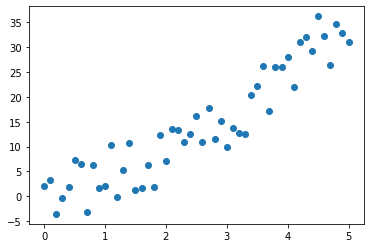

In [3]:
pit.scatter(x,y,label="input data set")

In [4]:
# 비선형 모델 클래스 
class NonLinearModel:
    def __call__(self, x):
        return self.Weight2 * x * x + self.Weight1 * x + self.Bias
    
    def __init__(self):
        self.Weight2 = tf.Variable(0.)
        self.Weight1 = tf.Variable(0.)
        self.Bias = tf.Variable(0.)

In [5]:
# 오차(손실) 구하기 함수
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

In [6]:
# 학습 함수
def train(non_linear_model, x, y, lr):
    with tf.GradientTape() as t:
        current_loss = loss(y, non_linear_model(x))

    lr_weight2, lr_weight1, lr_bias = t.gradient(current_loss, [non_linear_model.Weight2, non_linear_model.Weight1, non_linear_model.Bias])
    non_linear_model.Weight2.assign_sub(lr * lr_weight2)
    non_linear_model.Weight1.assign_sub(lr * lr_weight1)
    non_linear_model.Bias.assign_sub(lr * lr_bias)

0:: W2:1.1955313682556152 W1:0.3042735457420349 b:0.08532353490591049 Loss: 326.2778015136719 


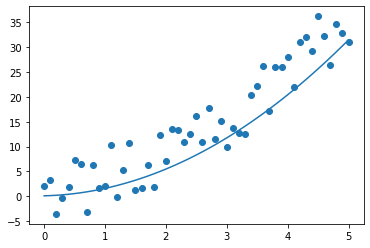

4000:: W2:1.0166000127792358 W1:1.9049729108810425 b:0.9076770544052124 Loss: 14.19775104522705 


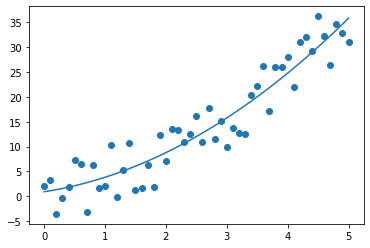

8000:: W2:1.005372166633606 W1:1.9686347246170044 b:0.838254451751709 Loss: 14.196837425231934 


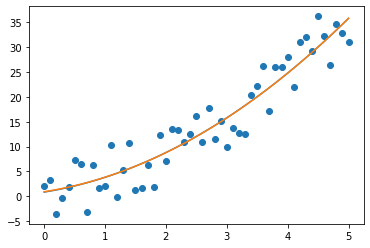

12000:: W2:1.0032148361206055 W1:1.9808670282363892 b:0.8249139785766602 Loss: 14.196805953979492 


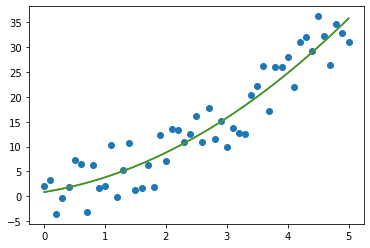

16000:: W2:1.0028020143508911 W1:1.9832075834274292 b:0.8223612308502197 Loss: 14.196805000305176 


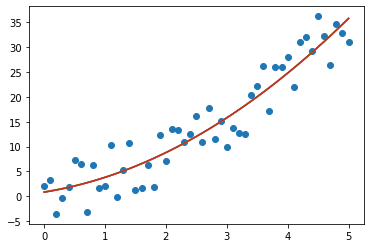

20000:: W2:1.0027225017547607 W1:1.9836609363555908 b:0.8218613266944885 Loss: 14.19680404663086 


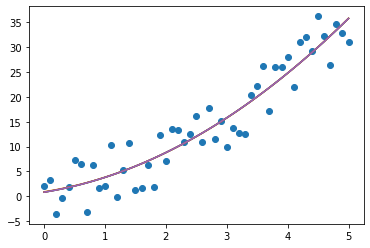

24000:: W2:1.0027211904525757 W1:1.9836691617965698 b:0.8218505382537842 Loss: 14.19680404663086 


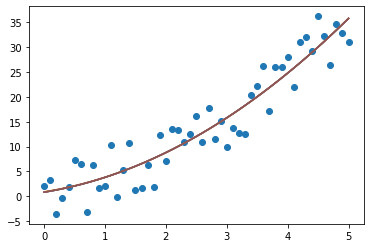

28000:: W2:1.0027211904525757 W1:1.9836691617965698 b:0.8218505382537842 Loss: 14.19680404663086 


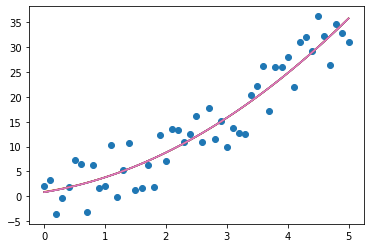

32000:: W2:1.0027211904525757 W1:1.9836691617965698 b:0.8218505382537842 Loss: 14.19680404663086 


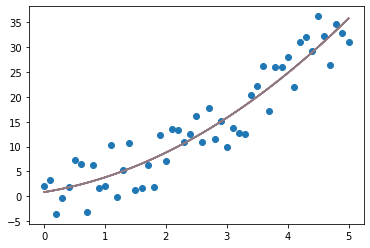

In [ ]:
# 학습 진행
non_linear_model = NonLinearModel()
epochs = 40000

line = []

for epoch_count in range(epochs + 1):
    real_loss = loss(y, non_linear_model(x))
    train(non_linear_model, x, y, lr=0.003)
    
    if epoch_count % 4000 == 0:
        print(f"{epoch_count}:: W2:{non_linear_model.Weight2.numpy()} W1:{non_linear_model.Weight1.numpy()} b:{non_linear_model.Bias.numpy()} Loss: {real_loss.numpy()} ")
        
        tmp_x=[a for a in x]
        tmp_y=[non_linear_model.Weight2.numpy() * b * b + non_linear_model.Weight1.numpy() * b + non_linear_model.Bias.numpy() for b in x]
        pit.close()
        pit.scatter(x,y,label="input data set")
        pit.plot(tmp_x,tmp_y)
        for i in line:
            pit.plot(i[0],i[1])
        if(epoch_count!=0):
            line.append([tmp_x,tmp_y])
        pit.show()